# Evaluate different datasets and models

This notebook loads precomputed results for two main experiments of the paper. The first experiment evaluates different cross-dataset splits for train/test of the networks and generates __Figure 3__ in the paper. The second experiment compares different network architectures trained on a mixed dataset, generating __Figure 4__ of the paper.

&copy; Johannes Zeitler (johannes.zeitler@fau.de) and Christof Weiß (christof.weiss@audiolabs-erlangen.de), 2020/21

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from FrameGenerators import ValidationGenerator
from utils_DL import removeStrFromList, predictAndSafe_downsample
import tensorflow as tf
from harmonicCQT import getHopSize

### 1. Load precomputed results

In [2]:
path_results = os.path.join('PrecomputedResults', 'musicalCNN_otherDatasets_eval_result.npy')
results = np.load(path_results, allow_pickle=True).item()

### 2. Evaluate cross-dataset splits

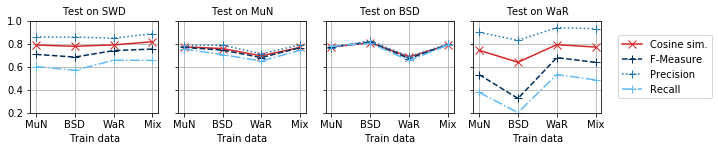

In [3]:
from matplotlib import colors

trainNets = ['2020-11-19_18-45-23mCNN_trainMusicNet',
            '2020-11-19_22-03-35mCNN_trainBeethovenPiano',
            '2020-11-20_03-56-59mCNN_trainWagnerPianoScore',
            '2020-11-20_07-44-49mCNN_trainMusicNet-BeethovenPiano-WagnerPianoScore']

# netLabels = ['MusicNet', 'BeethovenPno', 'WagnerPno', 'Mix']
netLabels = ['MuN', 'BSD', 'WaR', 'Mix']

blue1 = colors.to_rgb('tab:blue')
# print(blue1)
blue2 = (0.38, 0.73, 0.97)
blue3 = (0.52, 0.85, 1)
darkblue = (0.0, 0.18, 0.36)

testSets = {'SchubertWinterreise':None, 'MusicNet':None, 'BeethovenPiano':None, 'WagnerOrchestra':None}
testLabShort = ['SWD', 'MuN', 'BSD', 'WaR']

netX = np.arange(len(trainNets))

fig, axes = plt.subplots(1, 4, figsize=(10,2.2))
axes = axes.flatten()

for testIdx, testLabel in enumerate(testSets.keys()):

    testLabelShort = testLabShort[testIdx]
    axes[testIdx].set_title('Test on '+ testLabelShort, fontsize=10)

    cosSim = [results[n][testLabel]['cosine_similarity'] for n in trainNets]
    axes[testIdx].plot(netX, cosSim, label='Cosine sim.', linewidth=1.5, marker='x', markersize=8, color='tab:red')

    fMeasures = [results[n][testLabel]['fMeasure'] for n in trainNets]
    axes[testIdx].plot(netX, fMeasures, label='F-Measure', linewidth=1.5, marker='+', markersize=8, color=darkblue, linestyle='--')
    
    precisions = [results[n][testLabel]['Precision'] for n in trainNets]
    axes[testIdx].plot(netX, precisions, label='Precision', linewidth=1.5, marker='+', markersize=8, color=blue1, linestyle=':')
    
    recalls = [results[n][testLabel]['Recall'] for n in trainNets]
    axes[testIdx].plot(netX, recalls, label='Recall', linewidth=1.5, marker='+', markersize=8, color=blue2, linestyle='-.')
    
    
    if testLabel is 'WagnerOrchestra':
        axes[testIdx].legend(loc='center right', ncol=1, bbox_to_anchor=(1.9, .5))
    axes[testIdx].grid(axis='both')
    
    axes[testIdx].set_xticks(netX)
    axes[testIdx].set_xticklabels(netLabels)
    
    axes[testIdx].set_xlabel('Train data')
    if testLabel is 'SchubertWinterreise':
        a = 2
    else:
        axes[testIdx].set_yticklabels(['', '', '', '', '', '', '', ''])
    axes[testIdx].set_ylim([0.2, 1])

plt.tight_layout()

### 3. Compare different network architectures

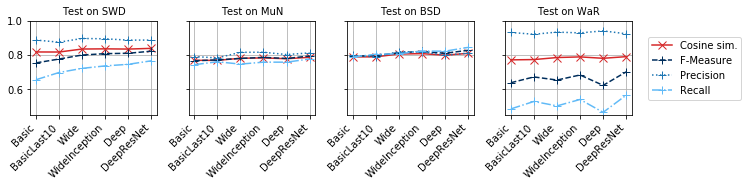

In [4]:
trainNets = ['2020-11-20_07-44-49mCNN_trainMusicNet-BeethovenPiano-WagnerPianoScore',
             '2020-11-27_10-18-41mCNN_trainMusicNet-BeethovenPiano-WagnerPianoScore_LastLayer10',
            '2020-11-20_15-41-39mCNN_WIDE_trainMusicNet-BeethovenPiano-WagnerPianoScore',
            '2020-11-22_11-47-41mCNN_WIDE-Inception_trainMusicNet-BeethovenPiano-WagnerPianoScore',
            '2020-11-20_15-47-45mCNN_DEEP_trainMusicNet-BeethovenPiano-WagnerPianoScore',           
            '2020-12-08_14-12-55mCNN_DEEP-ResNet_trainMusicNet-BeethovenPiano-WagnerPianoScore']

netLabels = ['Basic', 'BasicLast10', 'Wide', 'WideInception', 'Deep', 'DeepResNet']

testSets = {'SchubertWinterreise':None, 'MusicNet':None, 'BeethovenPiano':None, 'WagnerOrchestra':None}
testLabShort = ['SWD', 'MuN', 'BSD', 'WaR']

netX = np.arange(len(trainNets))

fig, axes = plt.subplots(1, 4, figsize=(10.5,2.7))
axes = axes.flatten()
for testIdx, testLabel in enumerate(testSets.keys()):
    testLabelShort = testLabShort[testIdx]
    axes[testIdx].set_title('Test on '+ testLabelShort, fontsize=10)   
    
    cosSim = [results[n][testLabel]['cosine_similarity'] for n in trainNets]
    axes[testIdx].plot(netX, cosSim, label='Cosine sim.', linewidth=1.5, marker='x', markersize=8, color='tab:red')

    fMeasures = [results[n][testLabel]['fMeasure'] for n in trainNets]
    axes[testIdx].plot(netX, fMeasures, label='F-Measure', linewidth=1.5, marker='+', markersize=8, color=darkblue, linestyle='--')
    
    precisions = [results[n][testLabel]['Precision'] for n in trainNets]
    axes[testIdx].plot(netX, precisions, label='Precision', linewidth=1.5, marker='+', markersize=8, color=blue1, linestyle=':')
    
    recalls = [results[n][testLabel]['Recall'] for n in trainNets]
    axes[testIdx].plot(netX, recalls, label='Recall', linewidth=1.5, marker='+', markersize=8, color=blue2, linestyle='-.')

    if testLabel is 'WagnerOrchestra':
        axes[testIdx].legend(loc='center right', ncol=1, bbox_to_anchor=(1.9, .5))
    #axes[testIdx].set_ylim([.3, 1])
    axes[testIdx].grid(axis='both')
    
    axes[testIdx].set_xticks(netX)
    axes[testIdx].set_xticklabels(netLabels, rotation=45, ha='right')
    
    if testLabel is 'SchubertWinterreise':
        a = 2
    else:
        axes[testIdx].set_yticklabels(['', '', '', '', '', '', '', ''])
    axes[testIdx].set_ylim([0.45, 1])

plt.tight_layout()